In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
os.chdir("..")

In [4]:
import torch
from diffusers.pipelines import FluxPipeline
from PIL import Image

from omini.pipeline.flux_omini import Condition, generate, seed_everything, convert_to_condition

In [5]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [6]:
pipe.unload_lora_weights()

for condition_type in ["canny", "depth", "coloring", "deblurring"]:
    pipe.load_lora_weights(
        "Yuanshi/OminiControl",
        weight_name=f"experimental/{condition_type}.safetensors",
        adapter_name=condition_type,
    )

pipe.set_adapters(["canny", "depth", "coloring", "deblurring"])

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
/home/cvlab17/anaconda3/envs/omini/lib/python3.12/site-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associate

In [7]:
image = Image.open("assets/coffee.png").convert("RGB")

w, h, min_dim = image.size + (min(image.size),)
image = image.crop(
    ((w - min_dim) // 2, (h - min_dim) // 2, (w + min_dim) // 2, (h + min_dim) // 2)
).resize((512, 512))

prompt = "In a bright room. A cup of a coffee with some beans on the side. They are placed on a dark wooden table."

  0%|          | 0/28 [00:00<?, ?it/s]

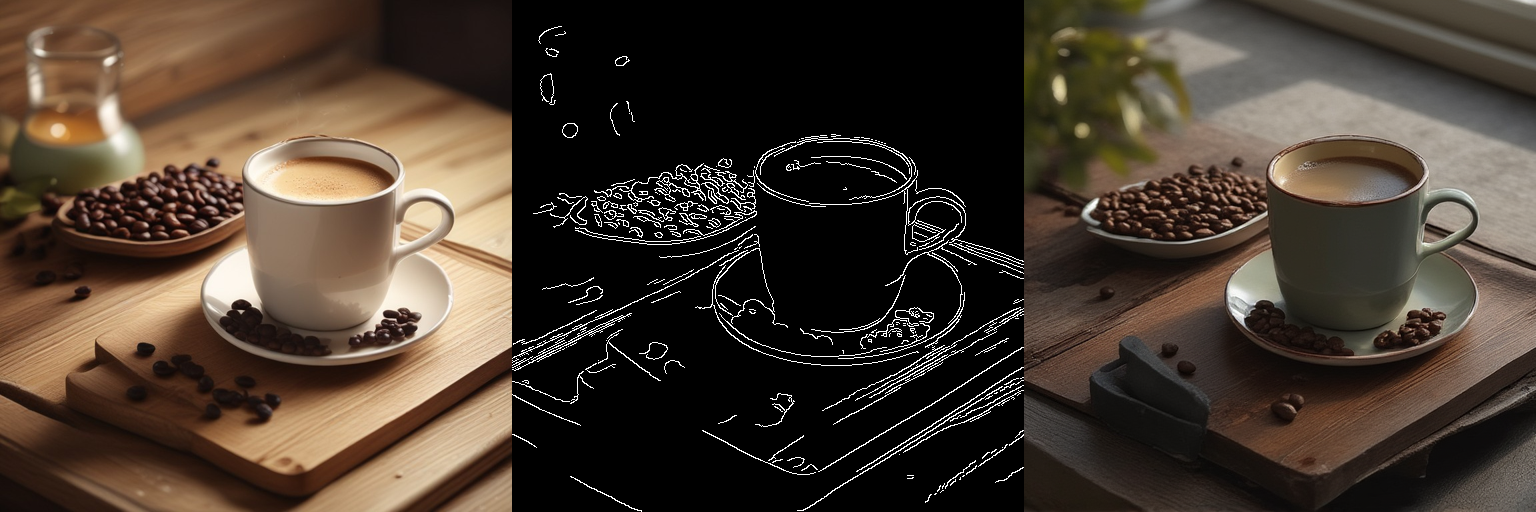

In [8]:
canny_image = convert_to_condition("canny", image)
condition = Condition(canny_image, "canny")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

In [9]:
depth_image = convert_to_condition("depth", image)
condition = Condition(depth_image, "depth")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


KeyboardInterrupt: 

In [ ]:
blur_image = convert_to_condition("deblurring", image)
condition = Condition(blur_image, "deblurring")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

In [ ]:
condition_image = convert_to_condition("coloring", image)
condition = Condition(condition_image, "coloring")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image